<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU"  />

    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Rafael Juarez Badillo Chavez y Paulo Adrián Villa Domínguez.

**Fecha:** 07 de enero del 2023.

**Expediente** : XXX, 733773.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/RafaJBZ/Tarea_2_RAJuarez_PAVilla

# Tarea 2: Clase 4

## Enunciado de tarea.
> Para ejemplo estudiado en esta clase data WWWUsage.csv probar lo siguiente:
1. Encontrar el mejor modelo ARIMA usando los criterios de AIC, BIC y log-verosimilitud, justificando la estructura propuesta.
2. Analizar el efecto de normalizar la serie de tiempo, es decir usar MinMaxScaler para normalizar los datos. Posterior a esto, realizar el mismo procedimiento realizado en clase y encontrar el mejor modelo de ARIMA. Justifique todos los análisis, incluyendo los resultados de las gráficas de ACF y PAC.
3. Investigar la implementación y teoría de los modelos SARIMAX. Además de eso, generar un modelo de pronóstico usando SARIMAX, donde todo el procedimiento anteriormente descrito es implementado, para el siguiente conjunto de datos con estacionalidad.
4. Realizar una predicción de 20 unidades de tiempo en el futuro, tanto para el modelo ARIMA como SARIMA y reportar los resultados en una gráfica donde se puedan observar los datos reales y los datos predichos,

In [32]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings("ignore")
plt.rc("font", size=12)

In [33]:
data = pd.read_csv(r'WWWusage.csv', names=[ 'values'], header=0)
data.index = data.index.droplevel()
data

,values
1,88
2,84
3,85
4,85
5,84
...,...
96,222
97,228
98,226
99,222


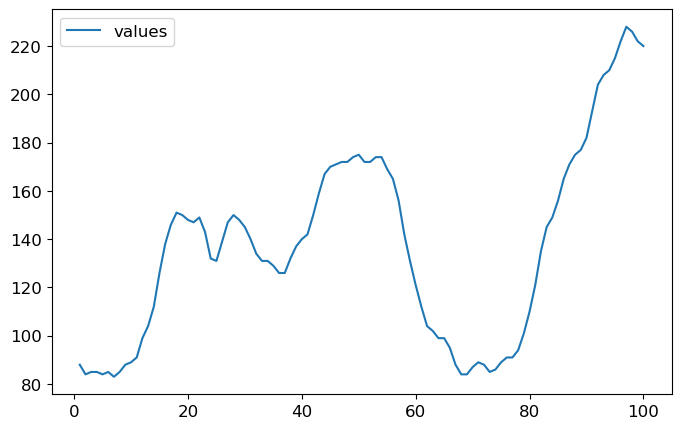

In [34]:
data.plot(figsize=(8,5))
plt.show()

In [35]:
# Función ADF
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

    if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [36]:
#Graficar ACF y PACF
def plot_acf_pacf(data, kwargs=dict()):
    f = plt.figure(figsize=(8,5))

    ax1 = f.add_subplot(121)

    plot_acf(data, zero=False, ax=ax1, **kwargs)

    ax2 = f.add_subplot(122)
    plot_pacf(data, zero=False, ax=ax2, method='ols', **kwargs)

    plt.show()

Código de solución estudiante 1

## 1️⃣

In [37]:
# Código de solución estudiante 1
# Dividimos los datos
train = data.iloc[:80]
test = data.iloc[80:]
train.shape, test.shape

((80, 1), (20, 1))

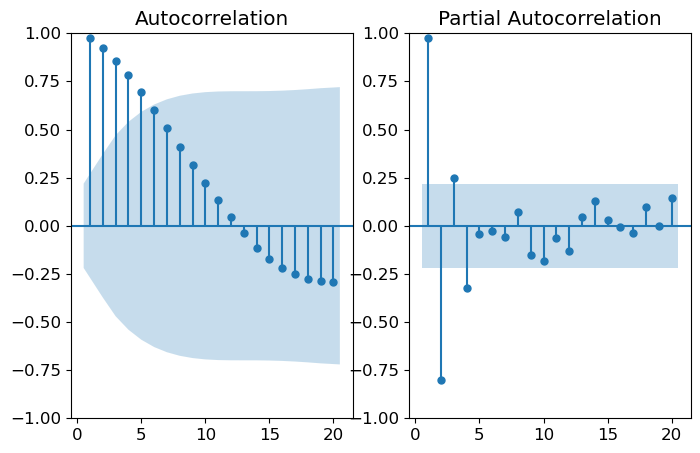

In [38]:
# Graficamos
plot_acf_pacf(train)

In [39]:
adf_test(train)

Results of Dickey-Fuller Test:
Test Statistic                 -2.649346
p-value                         0.083221
#Lags Used                      3.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64
Non-stationary


Vemos que no es estacionaria, diferenciemos para ver si podemos lograr que funcione

In [40]:
diff1_values = train.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_values)

diff2_values = train.diff().diff().dropna()

print('ADF para derivada segundo orden...\n')
adf_test(diff2_values)

ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                 -2.504537
p-value                         0.114374
#Lags Used                      2.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64
Non-stationary
ADF para derivada segundo orden...

Results of Dickey-Fuller Test:
Test Statistic                -8.236551e+00
p-value                        5.869012e-13
#Lags Used                     1.000000e+00
Number of Observations Used    7.600000e+01
Critical Value (1%)           -3.519481e+00
Critical Value (5%)           -2.900395e+00
Critical Value (10%)          -2.587498e+00
dtype: float64
Stationary


Prodria ser posible trabajar con las dos, pero cual funcionara mejor?

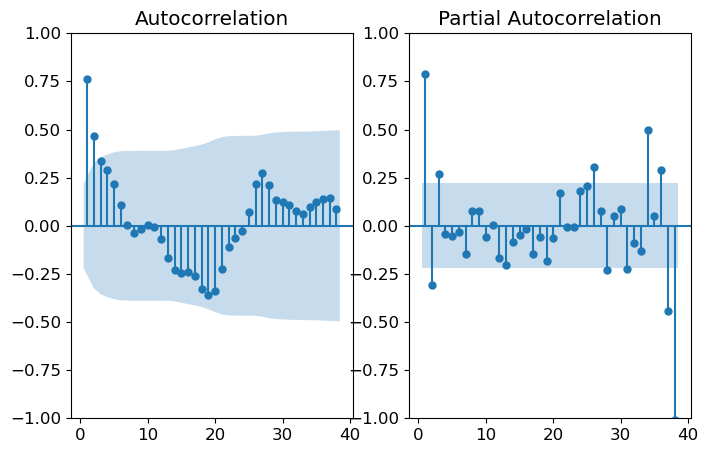

In [45]:
plot_acf_pacf(diff1_values, {'lags':38})

ARIMA(p=3, d=1, q=0)

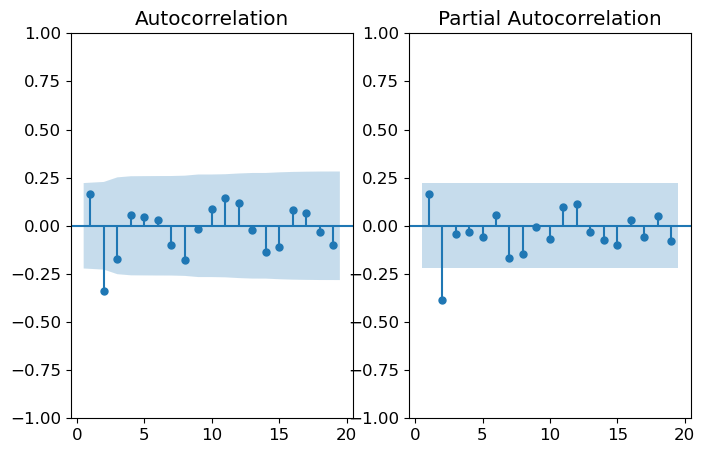

In [19]:
plot_acf_pacf(diff2_values, {'lags':40})

ARIMA(p=2, d=2, q=2)

In [48]:
# 1. Modelo de diferencia de primer orden
arima_model1 = ARIMA(train, order=(3, 1, 0))
model1 = arima_model1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   80
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -202.280
Date:                Mon, 06 Feb 2023   AIC                            412.560
Time:                        20:53:29   BIC                            422.038
Sample:                             0   HQIC                           416.357
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1057      0.110     10.037      0.000       0.890       1.322
ar.L2         -0.5786      0.140     -4.141      0.000      -0.852      -0.305
ar.L3          0.2645      0.107      2.470      0.0

In [49]:
# 2. Modelo de diferencia de segundo orden

# Basado en lo discutido anteriormente, necesitamos sólo considerar algunos términos AR y MA.
# Para ello definimos sus coeficientos cómo la especificación de polinomios

# Términos de AR
ar = (0, 1)  # (alpha1, alpha2)
# Términos de MA
ma = (0, 1)  # (beta1, beta2)

arima_model2 = ARIMA(train, order=(ar, 2, ma))
model2 = arima_model2.fit()
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   80
Model:             ARIMA([2], 2, [2])   Log Likelihood                -204.918
Date:                Mon, 06 Feb 2023   AIC                            415.836
Time:                        20:53:41   BIC                            422.906
Sample:                             0   HQIC                           418.666
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2         -0.1580      0.299     -0.528      0.598      -0.744       0.428
ma.L2         -0.2139      0.299     -0.716      0.474      -0.799       0.372
sigma2        11.1660      2.019      5.531      0.0

Parece que la mejor es la primera, ya que la log likelihood es mayor y el AIC y BIC son mas chicos

<AxesSubplot:>

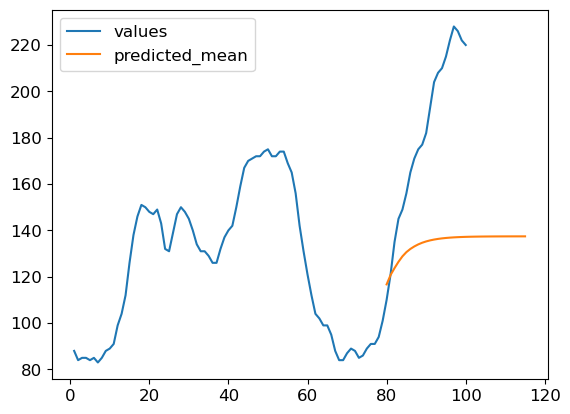

In [51]:
# Cómo realizar predicciones con el modelo ajustado
y_h = model1.predict(start=80, end=115, dynamic=False).to_frame()

ax = data.plot()

y_h.plot(ax=ax)

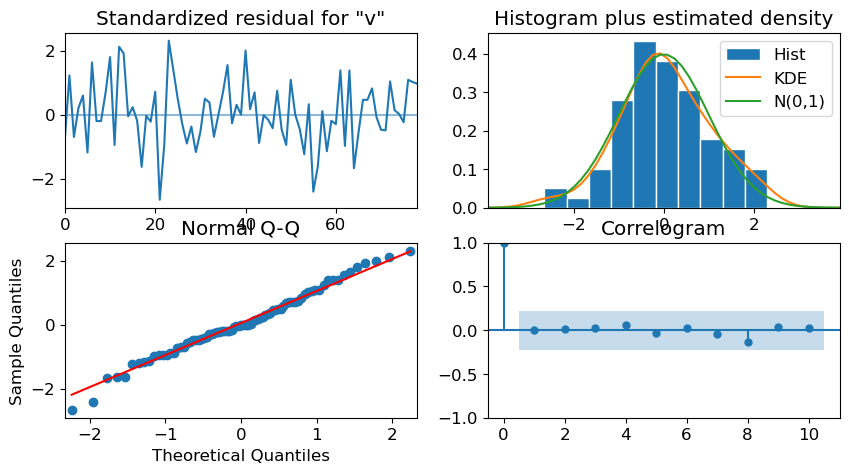

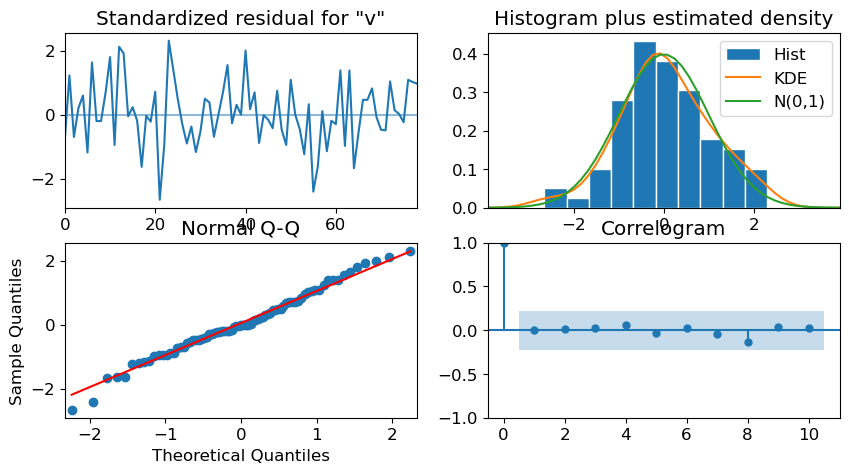

In [56]:
# Gráfico de los diagnósticos para los residuos
model1.plot_diagnostics(figsize = (10, 5))

----

## ✌️

In [82]:
# Normalización
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train)
scaled_data =  pd.DataFrame(scaled_data, columns=['values'])
scaled_data.index += 1
scaled_data

,values
1,0.054348
2,0.010870
3,0.021739
4,0.021739
5,0.010870
...,...
76,0.086957
77,0.086957
78,0.119565
79,0.195652


In [83]:
adf_test(scaled_data)

Results of Dickey-Fuller Test:
Test Statistic                 -2.649346
p-value                         0.083221
#Lags Used                      3.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64
Non-stationary


Parece que ni escalados son estacionarios, diferenciemos

In [84]:
diff1_values = scaled_data.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_values)

diff2_values = scaled_data.diff().diff().dropna()

print('ADF para derivada segundo orden...\n')
adf_test(diff2_values)

ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                 -2.504537
p-value                         0.114374
#Lags Used                      2.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64
Non-stationary
ADF para derivada segundo orden...

Results of Dickey-Fuller Test:
Test Statistic                -8.236551e+00
p-value                        5.869012e-13
#Lags Used                     1.000000e+00
Number of Observations Used    7.600000e+01
Critical Value (1%)           -3.519481e+00
Critical Value (5%)           -2.900395e+00
Critical Value (10%)          -2.587498e+00
dtype: float64
Stationary


Ahora grafiquemos para las dos

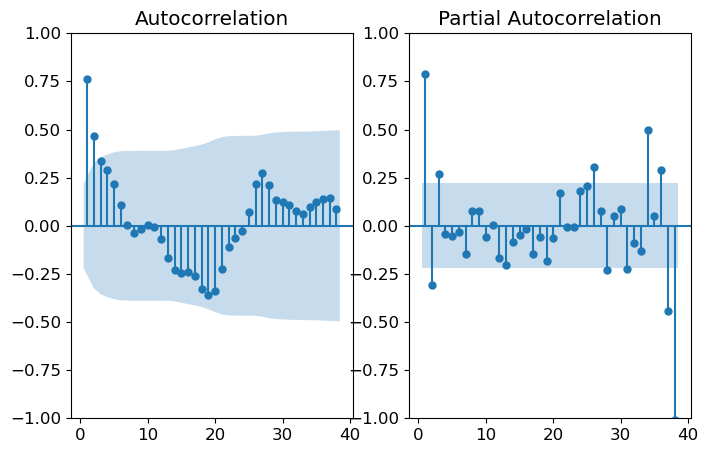

In [85]:
plot_acf_pacf(diff1_values, {'lags':38})

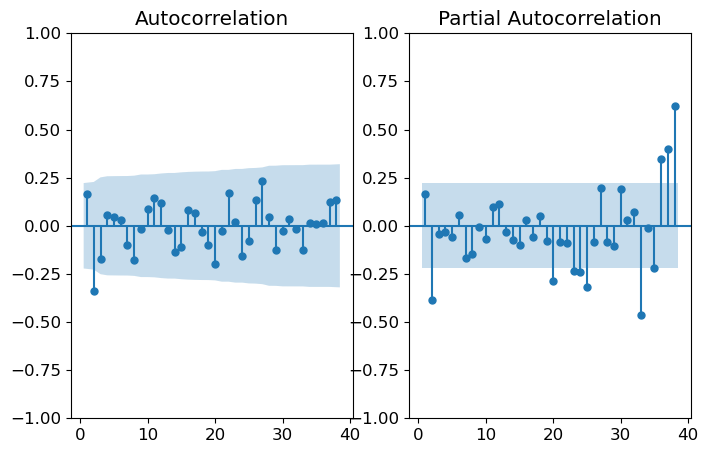

In [86]:
plot_acf_pacf(diff2_values, {'lags':38})

Se ven MUY similares entonces usaremos los mismos valores

In [88]:
# 1. Modelo de diferencia de primer orden
arima_model1 = ARIMA(scaled_data, order=(3, 1, 0))
model1 = arima_model1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   80
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 154.942
Date:                Mon, 06 Feb 2023   AIC                           -301.883
Time:                        21:13:54   BIC                           -292.406
Sample:                             0   HQIC                          -298.086
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1057      0.110     10.039      0.000       0.890       1.322
ar.L2         -0.5786      0.140     -4.142      0.000      -0.852      -0.305
ar.L3          0.2644      0.107      2.470      0.0

Subio el log likelihood!!! Eso es muy bueno 👌

<AxesSubplot:>

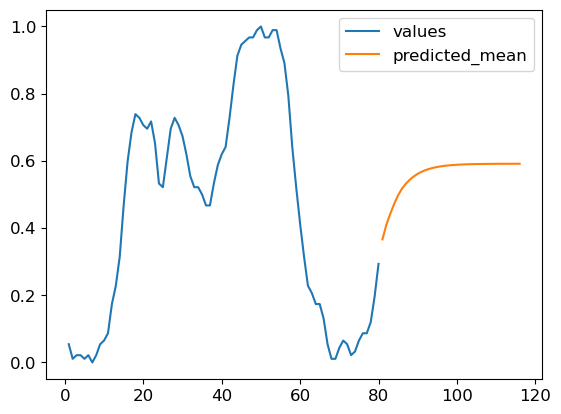

In [90]:
# Cómo realizar predicciones con el modelo ajustado
y_h = model1.predict(start=80, end=115, dynamic=False).to_frame()

ax = scaled_data.plot()

y_h.plot(ax=ax)

Se ve muy bien!

---

Código de solución estudiante 2

In [ ]:
# Código de solución estudiante 2
